#TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1djxup79_KiGtKFiH7AgSD0Bj-2D90TBg)

In [1]:
# Environment preparation
import sys
!pip install expectexception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Preparing environment
import expectexception

# %%expect_exception TypeError

In [3]:
!ls sample_data/

anscombe.json		      mnist_test.csv	     stock_sentiment.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


#TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [5]:
from pandas.core.dtypes.api import is_numeric_dtype

# Set format for float values
pd.options.display.float_format = '{:,.4f}'.format

In [6]:
# # Mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# load the stock news data
stock_df = pd.read_csv("sample_data/stock_sentiment.csv")
stock_df.shape

(5791, 2)

In [10]:
# Let's view the dataset 
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [11]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [12]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

**MINI CHALLENGE #1:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

In [13]:
print(stock_df.Sentiment.nunique())
stock_df.Sentiment.unique()

2


array([1, 0])

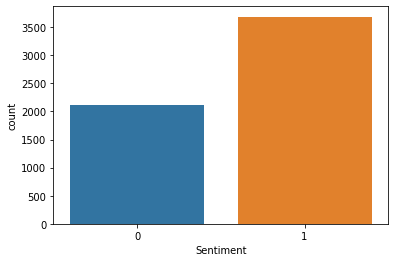

In [14]:
%matplotlib inline
sns.countplot(x=stock_df.Sentiment);

#TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)



In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# Let's see how we are going to remove punctuation
test = '$I love AI & Machine learning!!'
test.translate(str.maketrans('', '', string.punctuation))

'I love AI  Machine learning'

In [17]:
# Let's define a function to remove punctuations
removing_punctuation = lambda s: s.translate(str.maketrans('', '',string.punctuation))

# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(removing_punctuation)
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [18]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [19]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**MINI CHALLENGE #2:** 
- **Remove punctuations using a different method**

In [20]:
import re

test = '$I love AI & Machine learning!!'
re.sub(r'[^\w\s]','', test)

'I love AI  Machine learning'

In [21]:
stock_df['Text'].apply(lambda s: re.sub(r'[^\w\s]','', s))

0       Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1       user AAP MOVIE 55 return for the FEAGEED indic...
2       user Id be afraid to short AMZN  they are look...
3                                        MNTA Over 1200  
4                                         OI  Over 2137  
                              ...                        
5786    Industry body CII said discoms are likely to s...
5787    Gold prices slip below Rs 46000 as investors b...
5788    Workers at Bajaj Auto have agreed to a 10 wage...
5789    Sharemarket LIVE Sensex off days high up 600 p...
5790    Sensex Nifty climb off days highs still up 2 K...
Name: Text, Length: 5791, dtype: object

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [22]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [25]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    return [token 
            for token in gensim.utils.simple_preprocess(text) 
            if (len(token) > 3) and (token not in stop_words)]

In [27]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, trade, method, meth..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]


In [28]:
# join the words into a string
stock_df['Processed Join Text'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Processed Join Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, trade, method, meth...",kickers watchlist xide trade method method pre...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [29]:
print(f'''
{stock_df.Text[0]}

{stock_df['Text Without Punctuation'][0]}

{stock_df['Text Without Punc & Stopwords'][0]}

{stock_df['Processed Join Text'][0]}
''')


Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts

Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2 see prev posts

['kickers', 'watchlist', 'xide', 'trade', 'method', 'method', 'prev', 'posts']

kickers watchlist xide trade method method prev posts



**MINI CHALLENGE #3:**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

def preprocess(text):
    return [token 
            for token in gensim.utils.simple_preprocess(text) 
            if (len(token) > 2) and (token not in stop_words)]

# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

# join the words into a string
stock_df['Processed Join Text'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Processed Join Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


# TASK #5: PLOT WORDCLOUD

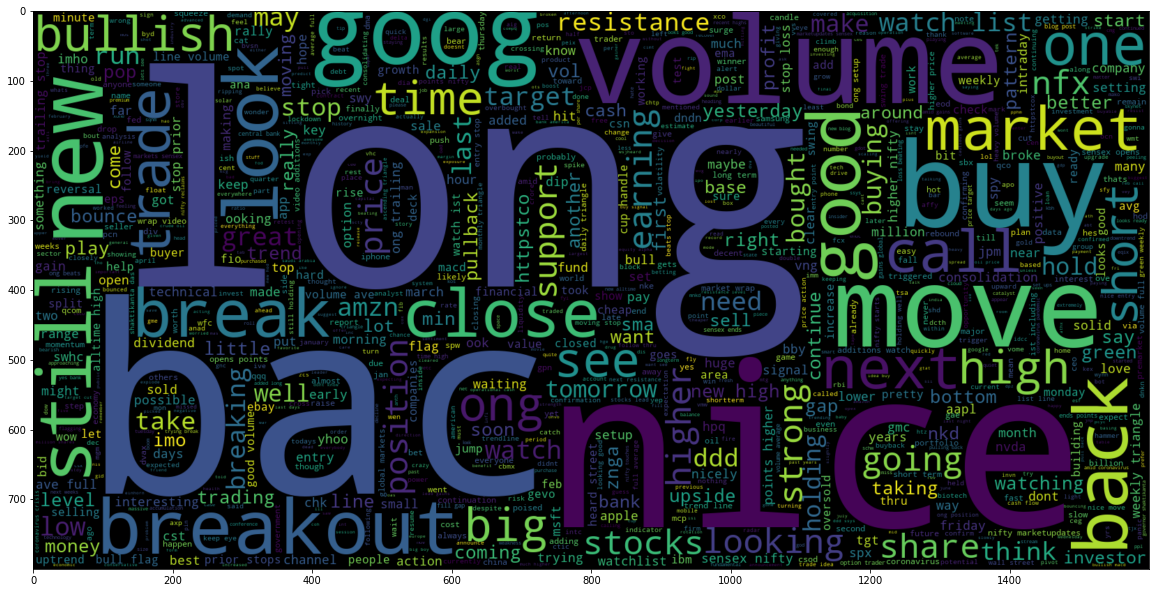

In [31]:
# plot the word cloud for text with positive sentiment
big_string_label_1 = " ".join(stock_df[stock_df['Sentiment'] == 1]['Processed Join Text'])
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(big_string_label_1)
plt.imshow(wc, interpolation = 'bilinear');

**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

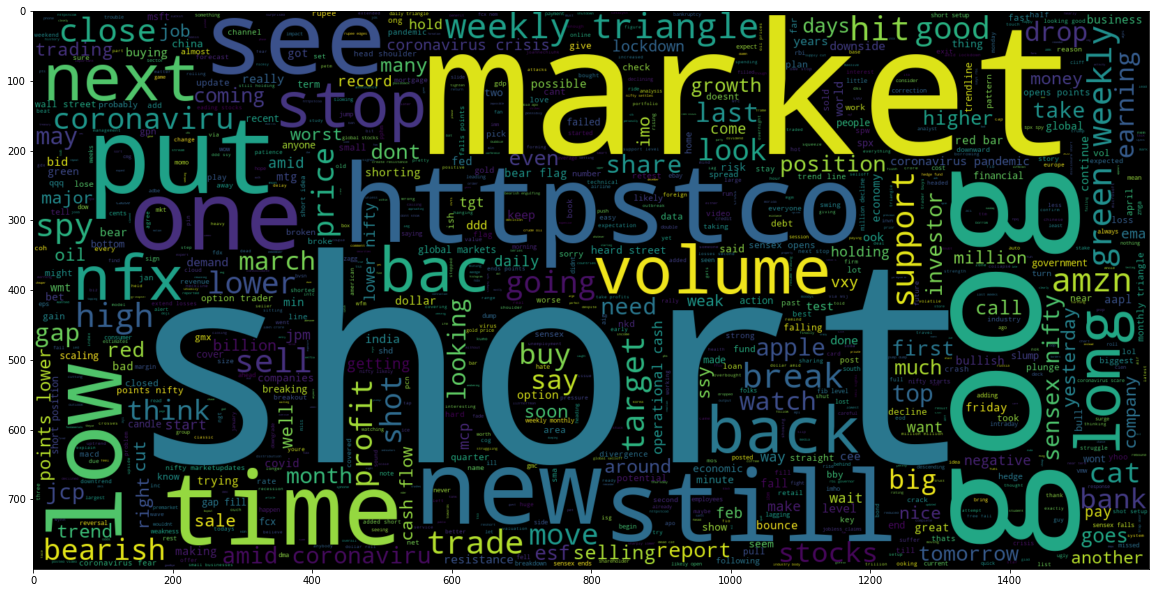

In [32]:
# plot the word cloud for text with negative sentiment
big_string_label_0 = " ".join(stock_df[stock_df['Sentiment'] == 0]['Processed Join Text'])
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(big_string_label_0)
plt.imshow(wc, interpolation = 'bilinear');

# TASK #6: VISUALIZE CLEANED DATASETS

In [33]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Processed Join Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
# word_tokenize is used to break up a string into words
print(stock_df['Processed Join Text'][0])
print(nltk.word_tokenize(stock_df['Processed Join Text'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [36]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
stock_df['tweets length'] = stock_df['Processed Join Text'].apply(lambda x: len(nltk.word_tokenize(x)))
print("The maximum number of words in any document is:", stock_df['tweets length'].max())

The maximum number of words in any document is: 20


In [37]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x=stock_df['tweets length'], nbins = 50)
fig.show();

**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

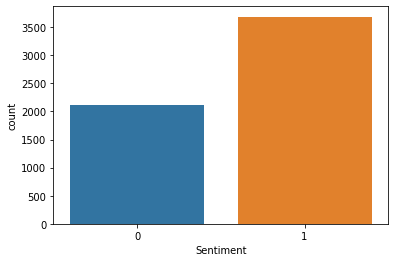

In [38]:
%matplotlib inline
sns.countplot(x=stock_df.Sentiment);

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

![alt text](https://drive.google.com/uc?id=13j8m-JOpK994CtukR1EShiY_hGGjkNx-)

In [39]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Processed Join Text,tweets length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...,14
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome,6
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...,7
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta,1
4,OI Over 21.37,1,OI Over 2137,[],,0


In [41]:
# Obtain the total words present in the dataset
list_of_words = stock_df['Text Without Punc & Stopwords'].sum()
print(list_of_words)

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts', 'movie', 'return', 'feageed', 'indicator', 'trades', 'awesome', 'afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks', 'mnta', 'pgnx', 'current', 'downtrend', 'break', 'otherwise', 'shortterm', 'correction', 'medterm', 'downtrend', 'mondays', 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'chk', 'biib', 'goog', 'ower', 'trend', 'line', 'channel', 'test', 'volume', 'support', 'watch', 'tomorrow', 'ong', 'entry', 'assuming', 'fcx', 'opens', 'tomorrow', 'trigger', 'buy', 'still', 'much', 'like', 'setup', 'really', 'worries', 'everyone', 'expects', 'market', 'rally', 'nowusually', 'exact', 'opposite', 'happens', 'every', 'time', 'shall', 'see', 'soon', 'bac', 'spx', 'jpm', 'gamcos', 'arry', 'haverty', 'apple', 'extremely', 'cheap', 'great', 'video', 'maykiljil', 'posted', 'agree', 'msft', 'going', 'higher', 'possibly', 'n

In [42]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [43]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [44]:
X_train.shape, X_test.shape

((5211,), (580,))

In [45]:
X_train

5785    [tcs, share, price, jumps, layoffs, dividend, ...
5789    [sharemarket, live, sensex, high, points, nift...
3822    [fdx, double, toppoing, beaish, monthy, gatey,...
295                 [green, weekly, triangle, sccpdating]
3571    [probably, small, fadethen, pop, finish, think...
                              ...                        
2959    [ddd, dipping, long, oversold, split, adn, ear...
4562    [notable, oil, gas, equipment, svs, stocks, oi...
2875    [green, weekly, monthly, triangle, isisnet, pr...
5282    [wells, fargo, curtailed, program, making, lar...
44                               [atice, tade, setp, cnx]
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [47]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [60]:
print(X_train[:5], '\n')
train_sequences[:5]

5785    [tcs, share, price, jumps, layoffs, dividend, ...
5789    [sharemarket, live, sensex, high, points, nift...
3822    [fdx, double, toppoing, beaish, monthy, gatey,...
295                 [green, weekly, triangle, sccpdating]
3571    [probably, small, fadethen, pop, finish, think...
Name: Text Without Punc & Stopwords, dtype: object 



[[2480, 145, 46, 699, 3629, 360, 1534, 16, 86, 146],
 [3630, 2481, 22, 53, 42, 29, 1535, 2480, 1121, 103, 23, 480, 40, 3631],
 [760, 387, 3632, 1891, 2482, 3633, 3634, 761],
 [41, 33, 25, 3635],
 [361, 125, 3636, 183, 1282, 71, 601, 41, 78, 1283]]

In [61]:
print(X_test[:5], '\n')
test_sequences[:5]

2016             [gnc, generators, running, hot]
4639    [feic, approaching, new, alltime, highs]
705                                       [nice]
752          [tol, finding, support, top, cloud]
21       [wont, believe, uptrend, back, crosses]
Name: Text Without Punc & Stopwords, dtype: object 



[[1070, 7565, 1397, 374],
 [4895, 892, 9, 396, 43],
 [11],
 [6932, 1706, 32, 142, 581],
 [436, 685, 306, 13, 959]]

In [78]:
print(f"""
The encoding for document
{X_train.iloc[1]} 
(len {len(X_train.iloc[1])})

is: 
{train_sequences[1]} 
(len {len(train_sequences[1])})
""")


The encoding for document
['sharemarket', 'live', 'sensex', 'high', 'points', 'nifty', 'tests', 'tcs', 'private', 'bank', 'stocks', 'lead', 'httpstco', 'xgtlrokui'] 
(len 14)

is: 
[3630, 2481, 22, 53, 42, 29, 1535, 2480, 1121, 103, 23, 480, 40, 3631] 
(len 14)



In [79]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen=29, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=29, padding='post', truncating='post')

In [80]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document: ", i," is:", doc)

The padded encoding for document:  0  is: [2480  145   46  699 3629  360 1534   16   86  146    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document:  1  is: [3630 2481   22   53   42   29 1535 2480 1121  103   23  480   40 3631
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document:  2  is: [ 760  387 3632 1891 2482 3633 3634  761    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [82]:
y_train[:5], y_test[:5]

(5785    1
 5789    1
 3822    0
 295     0
 3571    1
 Name: Sentiment, dtype: int64, 2016    1
 4639    1
 705     1
 752     1
 21      0
 Name: Sentiment, dtype: int64)

In [83]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

y_train_cat[:5], y_test_cat[:5]

(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32))

In [84]:
y_train_cat.shape, y_test_cat.shape

((5211, 2), (580, 2))

**MINI CHALLENGE #6:**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [89]:
# # Add padding to training and testing
# padded_train = pad_sequences(train_sequences, maxlen=15, padding='post', truncating='post')
# padded_test = pad_sequences(test_sequences, maxlen=15, padding='post', truncating='post')

# print('Padded train: \n', padded_train[:3], '\n\n')
# print('Padded test: \n', padded_test[:3])

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

![alt text](https://drive.google.com/uc?id=1Giaz7q1THBFTuNFpSyLBKnoUbbvWlNw3)

![alt text](https://drive.google.com/uc?id=1iDKpQqmGTNr3riuQOvXdiwfy9wlCU5st)

![alt text](https://drive.google.com/uc?id=1PxW6DBer4d1Q9_9OSaAQDTtqUdDGLdYa)

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

![alt text](https://drive.google.com/uc?id=1zpI1XHM1CSxLPjsW7QTahfs_f2stzKeQ)

In [90]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4745216   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [91]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 48s 347ms/step - loss: 0.6648 - acc: 0.6296 - val_loss: 0.6357 - val_acc: 0.6711
Epoch 2/2
131/131 [==============================] - 41s 317ms/step - loss: 0.5836 - acc: 0.7152 - val_loss: 0.5322 - val_acc: 0.7354


**MINI CHALLENGE #7:**
- **Train the model using different embedding output dimension**

In [92]:
model_challenge = Sequential()

# embedding layer
model_challenge.add(Embedding(total_words, output_dim = 256))

# Bi-Directional RNN and LSTM
model_challenge.add(Bidirectional(LSTM(128)))

# Dense layers
model_challenge.add(Dense(128, activation = 'relu'))
model_challenge.add(Dense(1,activation = 'sigmoid'))
model_challenge.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model_challenge.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2372608   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              394240    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,799,873
Trainable params: 2,799,873
Non-trainable params: 0
_________________________________________________________________


# TASK #8: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=1MZdb0g69XDC4JRATR9K6-2NAkrclGAXO)

In [93]:
# make prediction
pred = model.predict(padded_test)
pred[:5]

19/19 [==============================] - 2s 89ms/step


array([[0.1691532 , 0.8308467 ],
       [0.15178582, 0.8482141 ],
       [0.16168113, 0.8383189 ],
       [0.3100719 , 0.6899282 ],
       [0.20474143, 0.7952585 ]], dtype=float32)

In [97]:
# make prediction
prediction = np.argmax(pred, axis=1)
prediction[:5]

array([1, 1, 1, 1, 1])

In [101]:
# list containing original values
y_test[:5], y_test_cat[:5]

(2016    1
 4639    1
 705     1
 752     1
 21      0
 Name: Sentiment, dtype: int64, array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32))

In [103]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
accuracy

0.7155172413793104

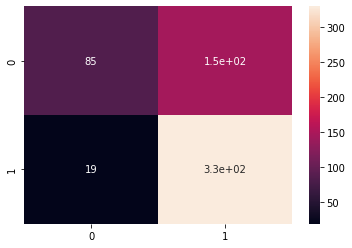

In [105]:
%matplotlib inline
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot = True);

**MINI CHALLENGE #8:**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

In [106]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 41.2 MB/s 
     |████████████████████████████████| 182 kB 56.7 MB/s 


In [146]:
# Use pipeline from transformer to perform specific task. 
# Mention sentiment analysis as task and pass in the string to it, to get the results
# We can specify tasks like topic modeling, Q and A, text summarization here.
# source = https://huggingface.co/models
from transformers import pipeline

nlp = pipeline('sentiment-analysis', model="siebert/sentiment-roberta-large-english")

In [158]:
# Make prediction on the test data
print(X_test.iloc[0])
nlp(X_test.iloc[0])

['gnc', 'generators', 'running', 'hot']


[{'label': 'POSITIVE', 'score': 0.9196195602416992},
 {'label': 'POSITIVE', 'score': 0.9925421476364136},
 {'label': 'POSITIVE', 'score': 0.9924473762512207},
 {'label': 'POSITIVE', 'score': 0.9973299503326416}]

In [178]:
def make_pred_with_bert_model(X_test, y_test):
  print(f'Values:\n{X_test}\n\n')
  
  pred = nlp(X_test)
  print(f'Predictions:\n{pred}')
  print(list(map(lambda d: d['label'], pred)))
  pred = list(map(lambda d: 1 if d['label']=='POSITIVE' else 0, pred))
  print(pred, '\n\n')

  print(f'Real Labels:\n{list(y_test)}\n\n')

  accuracy = accuracy_score(y_test, pred)
  print(f'Accuracy: {accuracy}')

In [179]:
make_pred_with_bert_model(list(X_test[:5].apply(lambda s: ' '.join(s))), y_test[:5])

Values:
['gnc generators running hot', 'feic approaching new alltime highs', 'nice', 'tol finding support top cloud', 'wont believe uptrend back crosses']


Predictions:
[{'label': 'NEGATIVE', 'score': 0.9968440532684326}, {'label': 'POSITIVE', 'score': 0.9526361227035522}, {'label': 'POSITIVE', 'score': 0.9998552799224854}, {'label': 'POSITIVE', 'score': 0.996029257774353}, {'label': 'POSITIVE', 'score': 0.7200251817703247}]
['NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE']
[0, 1, 1, 1, 1] 


Real Labels:
[1, 1, 1, 1, 0]


Accuracy: 0.6


In [190]:
sample = stock_df.loc[X_test.index].head(5)
sample

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Processed Join Text,tweets length
2016,GNC generators running hot,1,GNC generators running hot,"[gnc, generators, running, hot]",gnc generators running hot,4
4639,FEIC is approaching new all-time highs,1,FEIC is approaching new alltime highs,"[feic, approaching, new, alltime, highs]",feic approaching new alltime highs,5
705,nice DE.,1,nice DE,[nice],nice,1
752,tol finding support at top of the cloud,1,tol finding support at top of the cloud,"[tol, finding, support, top, cloud]",tol finding support top cloud,5
21,Won't believe AAP uptrend is back until it cro...,0,Wont believe AAP uptrend is back until it cros...,"[wont, believe, uptrend, back, crosses]",wont believe uptrend back crosses,5


In [191]:
make_pred_with_bert_model(list(sample.Text), sample.Sentiment)

Values:
['GNC  generators running hot   ', 'FEIC is approaching new all-time highs', 'nice DE.', 'tol finding support at top of the cloud   ', "Won't believe AAP uptrend is back until it crosses above MA(50)"]


Predictions:
[{'label': 'NEGATIVE', 'score': 0.9968440532684326}, {'label': 'POSITIVE', 'score': 0.9954831600189209}, {'label': 'POSITIVE', 'score': 0.9997016787528992}, {'label': 'POSITIVE', 'score': 0.9938583970069885}, {'label': 'NEGATIVE', 'score': 0.9721421599388123}]
['NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE']
[0, 1, 1, 1, 0] 


Real Labels:
[1, 1, 1, 1, 0]


Accuracy: 0.8


In [192]:
make_pred_with_bert_model(list(sample['Processed Join Text'][:5]), sample.Sentiment[:5])

Values:
['gnc generators running hot', 'feic approaching new alltime highs', 'nice', 'tol finding support top cloud', 'wont believe uptrend back crosses']


Predictions:
[{'label': 'NEGATIVE', 'score': 0.9968440532684326}, {'label': 'POSITIVE', 'score': 0.9526361227035522}, {'label': 'POSITIVE', 'score': 0.9998552799224854}, {'label': 'POSITIVE', 'score': 0.996029257774353}, {'label': 'POSITIVE', 'score': 0.7200251817703247}]
['NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE']
[0, 1, 1, 1, 1] 


Real Labels:
[1, 1, 1, 1, 0]


Accuracy: 0.6


# **EXCELLENT JOB!**